In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df = df.iloc[:,1:]

In [7]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
# Steps

# preprocessing + EDA +Feature selection
# Extract input and output cols
# Scale the values
# Train test split
# Train the model
# Evaluate the model/model selection
# Deploy the model

In [8]:

pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
# import matplotlib.pyplot as plt

In [10]:
# pip uninstall matplotlib

In [11]:
# pip install matplotlib

In [12]:
import matplotlib.pyplot as plt

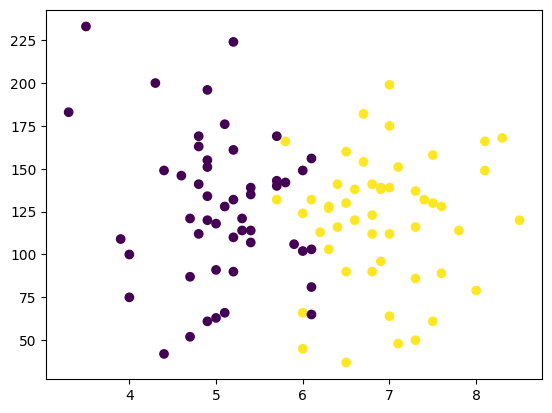

In [14]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [18]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [19]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train=scaler.fit_transform(X_train)

In [26]:
X_train

array([[ 1.10303897, -1.86207601],
       [ 0.83593536, -0.27648405],
       [ 1.10303897, -0.94140971],
       [-0.05440999,  0.03040472],
       [ 1.37014258,  0.13270098],
       [ 0.12365908, -0.25090998],
       [ 1.10303897,  0.36286755],
       [-0.76668628, -0.83911345],
       [-1.12282442,  1.02779321],
       [ 0.83593536, -1.50403912],
       [ 1.10303897, -0.17418779],
       [-0.23247907,  0.49073787],
       [ 0.56883176,  0.79762664],
       [-1.83510071, -0.58337281],
       [ 0.83593536,  0.41401568],
       [-0.05440999, -1.45289099],
       [ 1.99338432,  1.15566353],
       [-0.67765174, -0.04631747],
       [-1.92413524, -0.35320624],
       [-0.94475535, -0.12303966],
       [ 0.39076268,  0.1838491 ],
       [ 0.21269361, -0.50665062],
       [-0.76668628,  0.23499723],
       [-1.83510071, -1.22272441],
       [ 1.1920735 ,  0.23499723],
       [ 0.9249699 ,  0.72090445],
       [ 0.39076268, -0.83911345],
       [-1.12282442, -0.27648405],
       [ 0.30172815,

In [27]:
X_test= scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [30]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred=clf.predict(X_test)

In [32]:
y_test

39    0
17    0
78    0
35    1
24    0
52    1
8     0
9     0
80    0
25    0
Name: placement, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.8

In [37]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

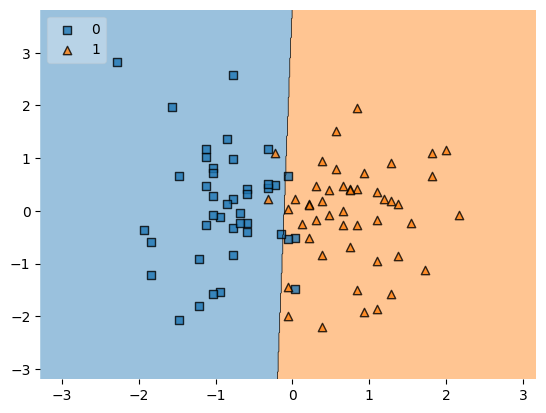

In [38]:
plot_decision_regions(X_train,y_train.values,clf=clf, legend=2)

In [39]:
import pickle

In [40]:
pickle.dump(clf,open('model.pkl','wb'))